# Using the R interface

Given that R already has a wide body of change point detection methods, Fastchange exposes an optional rpy2-based interface for calling R change point libraries with a Scikit-learn API. While the Fastchange classes will be the fastest and easiest to extend, sometimes its useful being able leverage other libraries.

## Installing the R interface

There are a few installation steps to get the R interface working. First, you need to have a local R installation and the needed packages. Install R using the official R site (https://www.r-project.org/) and install the changepoint, changepoint.np, and bocp libraries. The second step in getting the interface working is installing Fastchange with the optional R dependency:

**For conda:**

`conda install -c gursky1 fastchange`

then:

`pip install rpy2`

**For pip:**

`pip install fastchange[r]`

This will install `rpy2`, a Python package used for calling R. See more at the `rpy2` homepage here: https://rpy2.github.io/.

## Detecting change points

Calling R change point libraries in Fastchange is very similar to the native Python classes. The only difference is in lieu of passing a cost function class and a penalty function we pass them in via string arguments as shown in the example below. See the r changepoint documentation for available arguments: https://cran.r-project.org/web/packages/changepoint/changepoint.pdf

In [3]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt

from fastchange.r import ROfflineChangepoint

In [4]:
# Creating synthetic data
data = np.hstack([
    np.random.normal(0, 1, (100,)),
    np.random.normal(5, 2, (100,))
])

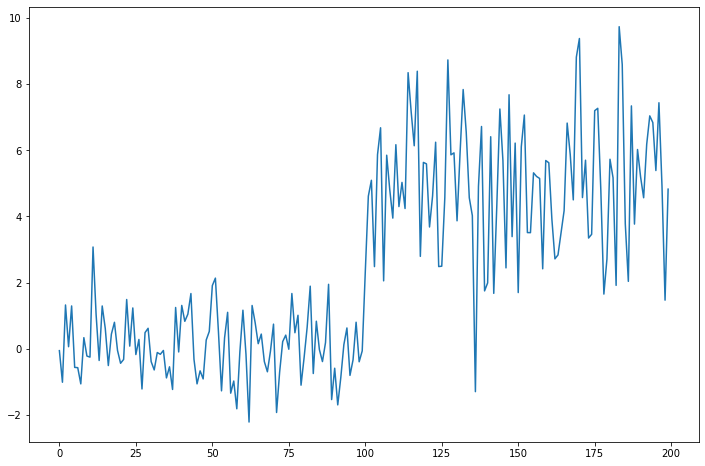

In [5]:
# Plotting our synthetic data
plt.figure(figsize=(12, 8))
plt.plot(data)
plt.show()

In [9]:
# Fitting our model
model = ROfflineChangepoint(method='AMOC').fit(data)
cpts = model.predict()

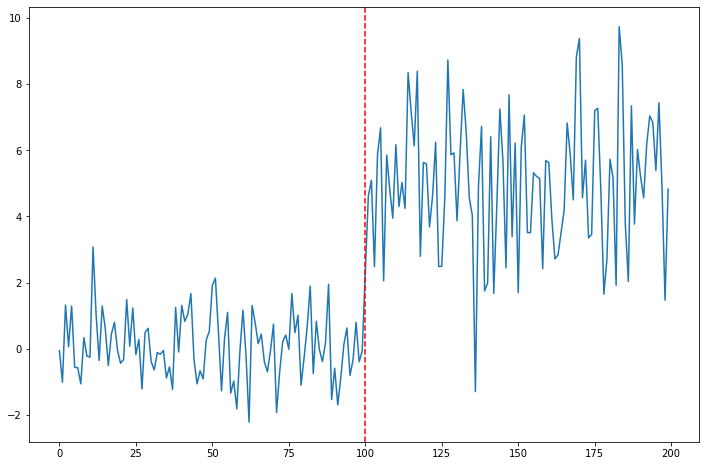

In [10]:
# Plotting our synthetic data with detected change points
plt.figure(figsize=(12, 8))
plt.plot(data)
for i in cpts:
    plt.axvline(i, color='red', linestyle='--')
plt.show()